
##  INTRODUCTION 🔎

<a id="2"></a>

## <b>2<span style='color:#80055D'>|</span> IMPORT NECESSARY LIBRARIES 🎬</b>

In [1]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from termcolor import colored
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#ignore warnings
import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [2]:
wine = pd.read_csv(r"D:\praxis\python\project_cv\winequality-red.csv")
df = wine.copy()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Get basic information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## The Dataset is having 12 column and 1599 rows with no missing values and there is one column with int data type and 11 with float datatype

## Descriptive Statistics of Numeric Variables

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## What we can see from statistic:
## The average value of fixed acidity is 8.31, the highest value is 15.9 and min value is 4.6
## The average value of volatile acidity is 0.52, the highest value is 1.58 and min value is 0.12
## The average value of citric acid is 0.27, the highest value is 1 and min value is 0.0
## The average value of residual sugar is 2.53, the highest value is 15.5 and min value is 0.90
## The average value of chlorides is 0.08, the highest value is 0.61 and min value is 0.012
## The average value of free sulfur dioxide is 15.87, the highest value is 72 and min value is 1
## The average value of total sulfur dioxide is 46.46, the highest value is 289 and min value is 6
## The average value of density is 0.99, the highest value is 1 and min value is 0.99
## The average value of pH is 3.31, the highest value is 4.01 and min value is 2.74
## The average value of sulphates is 0.65, the highest value is 2 and min value is 0.33
## The average value of alcohol is 10.42, the highest value is 8.4


## Features like total sulfur dioxide and residual sugar have high maximum values compared to their means, indicating potential outliers. Handling outliers can improve model performance.

## Some features have different scales and variances, such as total sulfur dioxide and density

In [5]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<a id="4.5"></a>

#### <b>4.5 <span style='color:#80055D'>|</span> Rename Column Names</b>

In [6]:
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

## EDA and Data Visualization

## Histplot

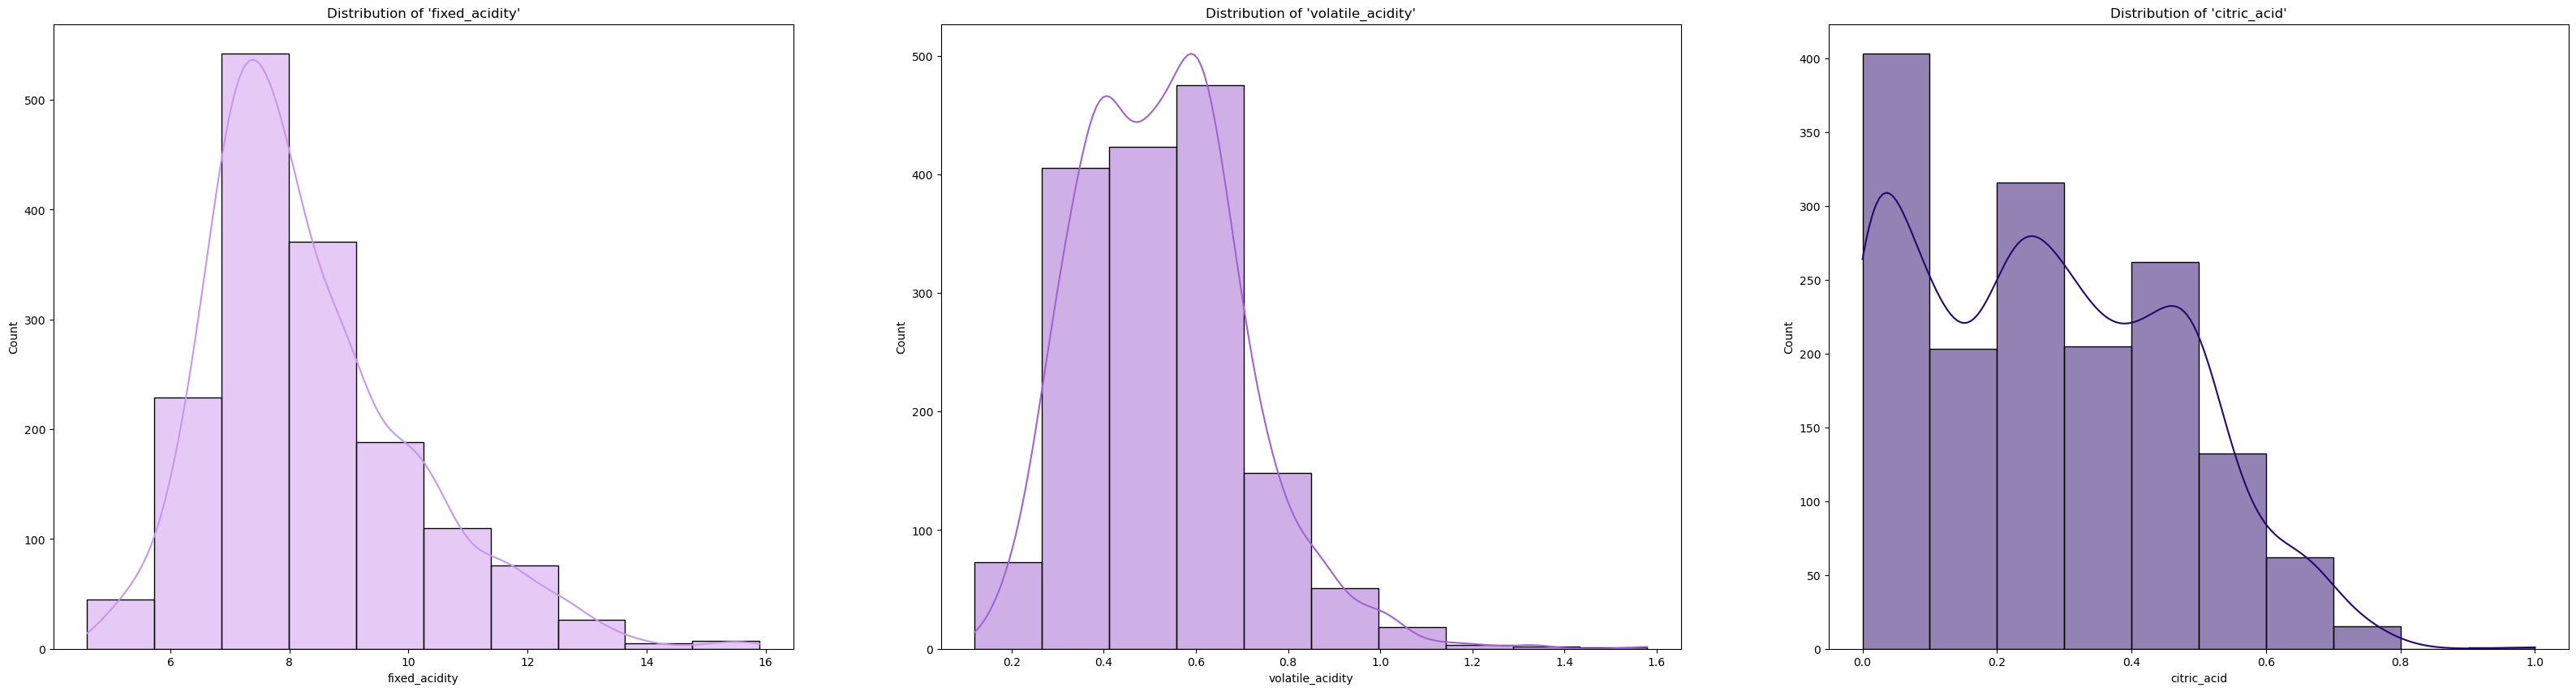

In [7]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))

sns.histplot(ax = axes[0], x = df["fixed_acidity"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'fixed_acidity'");

sns.histplot(ax = axes[1], x = df["volatile_acidity"],
             bins = 10,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'volatile_acidity'");

sns.histplot(ax = axes[2], x = df["citric_acid"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'citric_acid'");

## Distribution:Analyzing the graphs here, it turns out that the values of the variable 'fixed_acidity' are relatively normally distributed (but a bit left skewed). But there are two peaks in the distributions of other 'volatile_acidity' and 'citric_acid' variables.

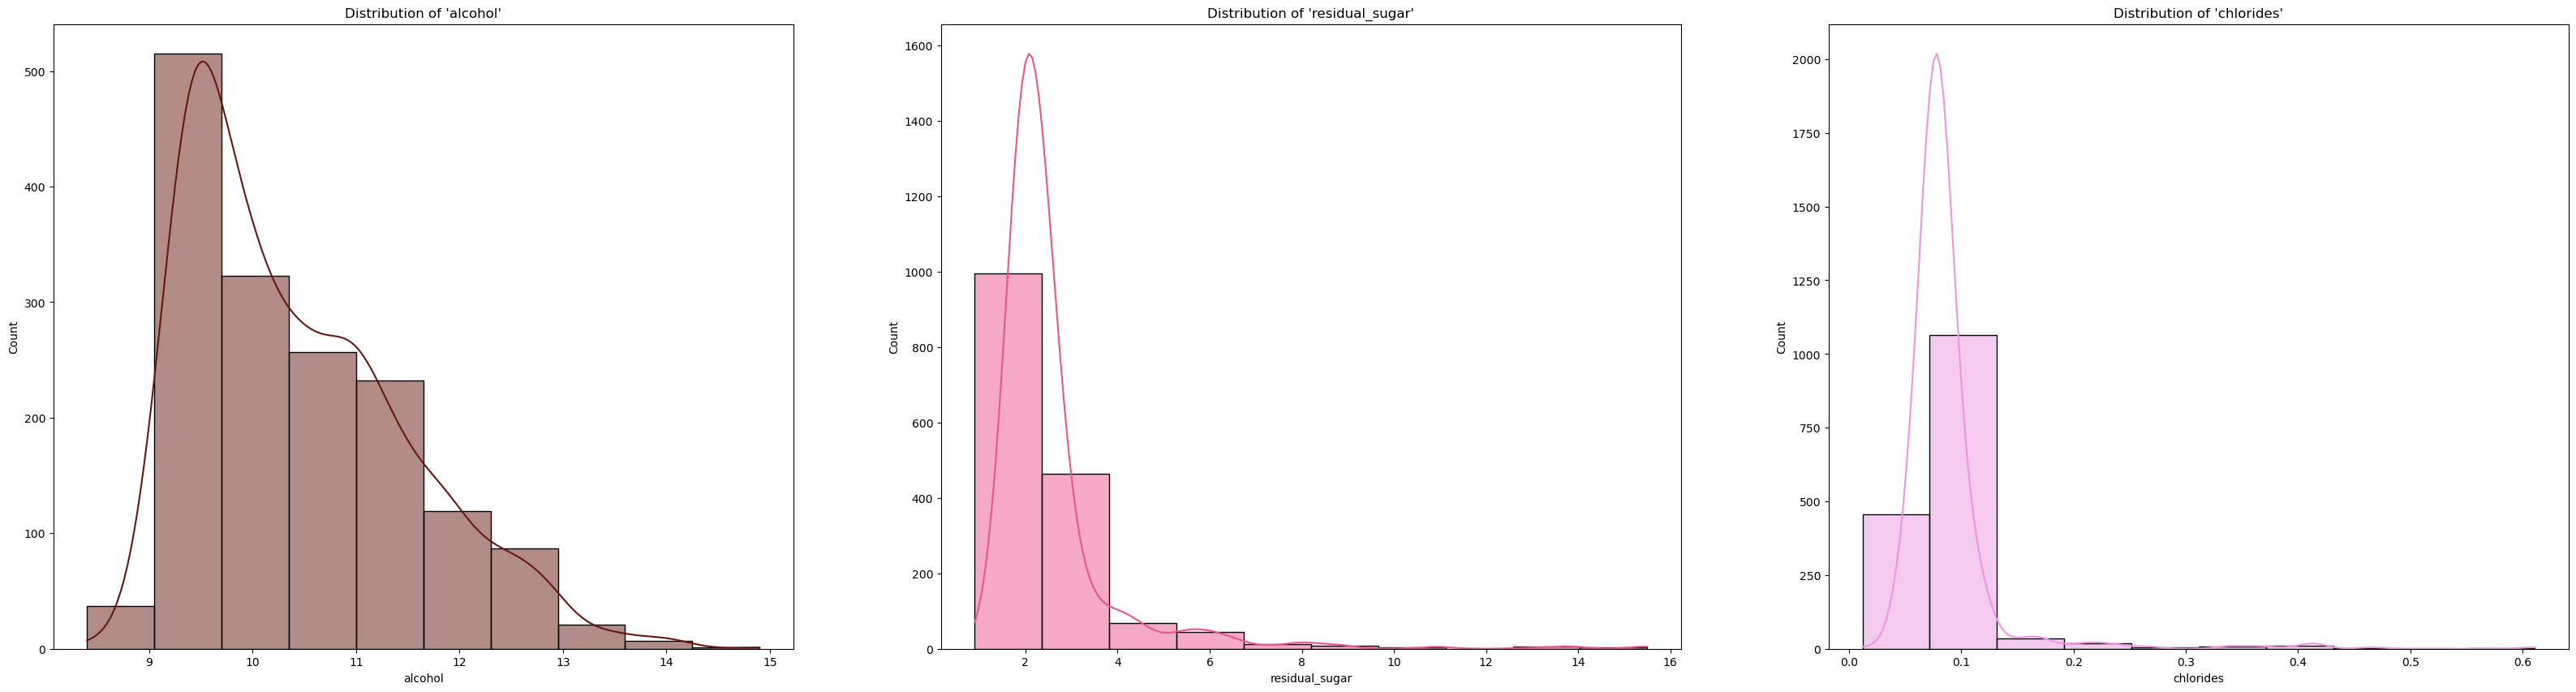

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

sns.histplot(ax = axes[0], x = df["alcohol"],
             bins = 10,    
             kde = True,
             cbar = True,
             color = "#641811").set(title = "Distribution of 'alcohol'");

sns.histplot(ax = axes[1], x = df["residual_sugar"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#EB548C").set(title = "Distribution of 'residual_sugar'");

sns.histplot(ax = axes[2], x = df["chlorides"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#EC96E0").set(title = "Distribution of 'chlorides'");

## Distribution:Analyzing the graphs here, it turns out that the distributions of these variables are not normal

## Scatterplot

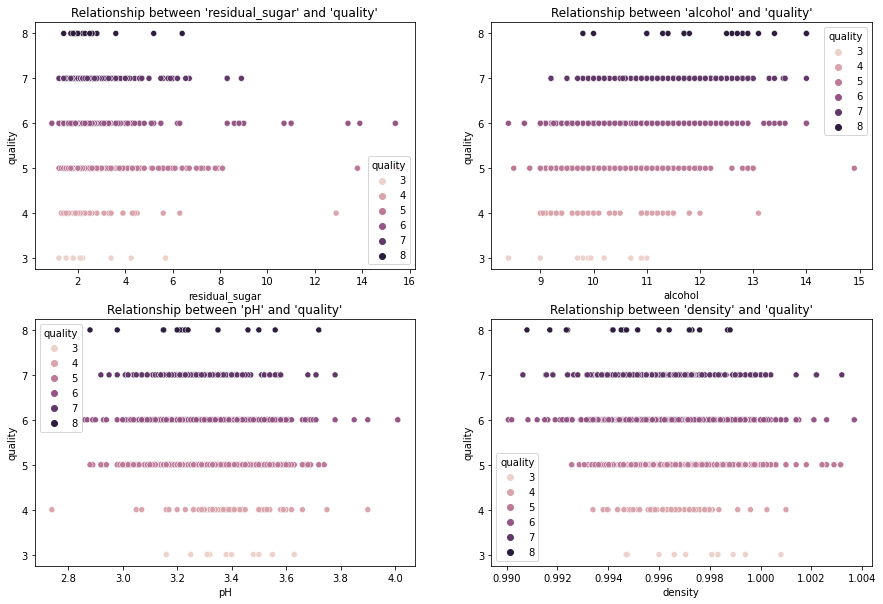

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "residual_sugar",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'alcohol' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "pH",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'pH' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "density",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'density' and 'quality'");

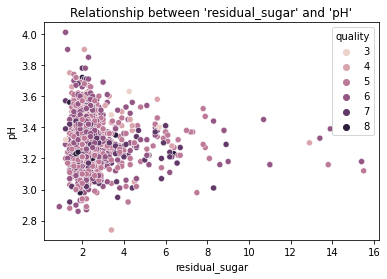

In [13]:
sns.scatterplot(x = "residual_sugar",
                y = "pH",
                hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'pH'");

In [ ]:
## Residual_sugar' and 'pH: There is no correlation between residual and pH

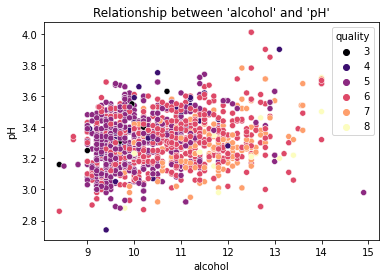

In [14]:
sns.scatterplot(x = "alcohol",
                y = "pH",
                hue = "quality",
                palette = "magma",
                data = df).set(title = "Relationship between 'alcohol' and 'pH'");

In [ ]:
## alcohol' and 'pH: There is no correlation between alcohol and pH

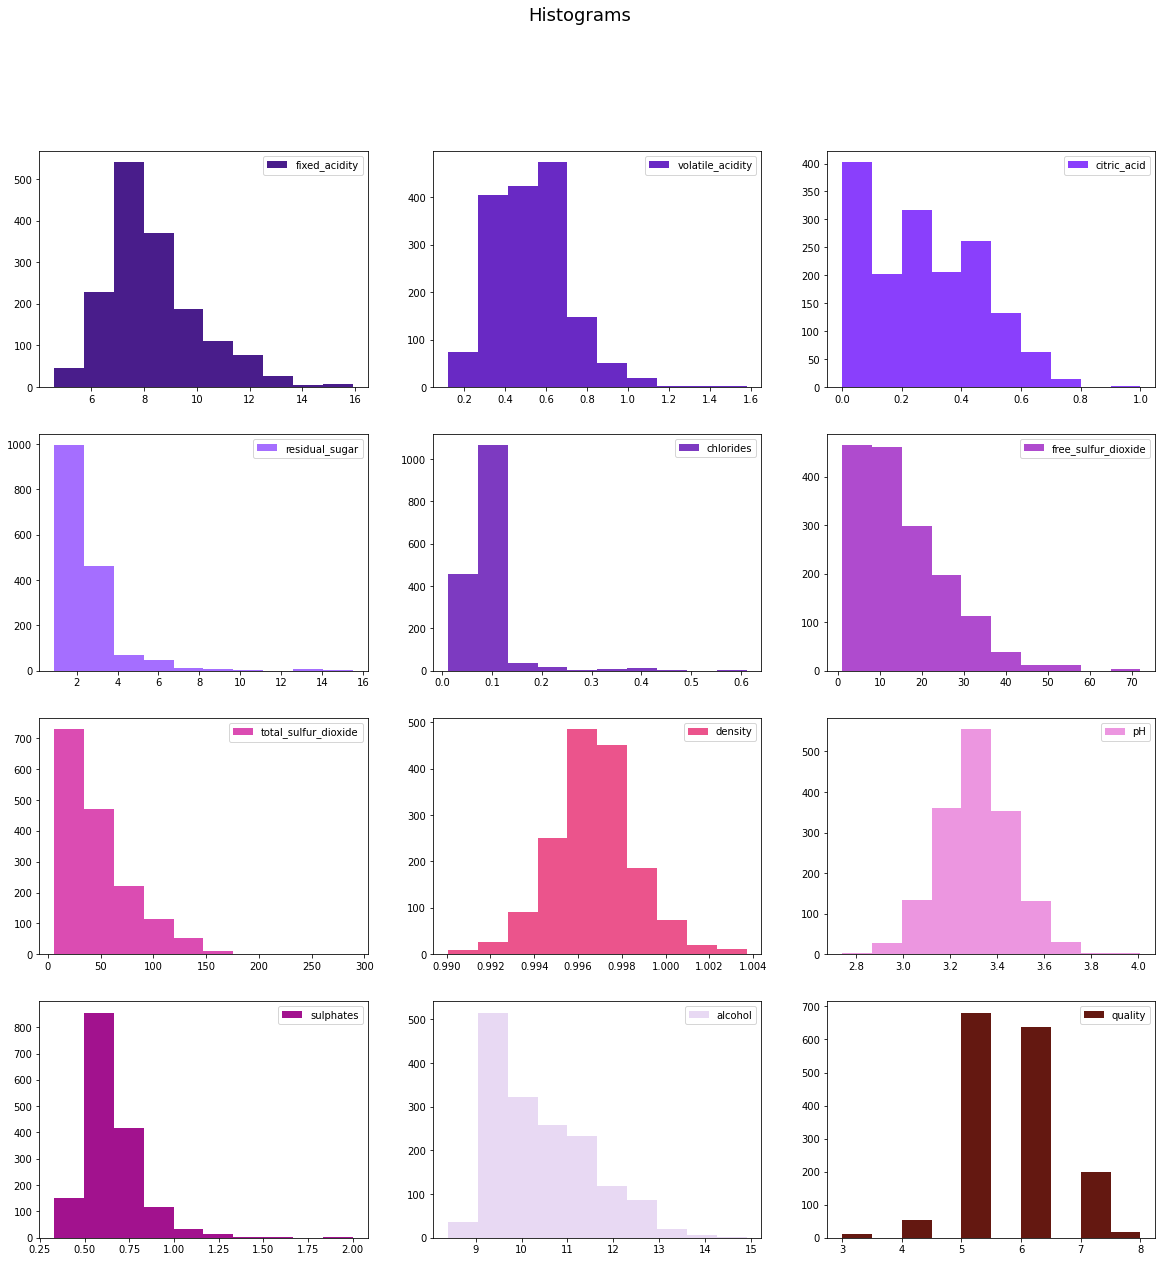

In [15]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 20))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

for index, column in enumerate(df.columns):
    ax = axes.flatten()[index]
    ax.hist(df[column], color = colors[index], label = column)
    ax.legend(loc = "best")
plt.suptitle("Histograms", size = 18)

plt.show()

## From the above graph we can see the distribution of all variables.

## The values of 'pH' and "density" variables are relatively normally distributed.
## Most of the values ​​of the "fixed_acidity" variable are in the range of 7 - 9
## Most values ​​of the "citric_acid" variable are in the range of 0.0 - 0.1
## Most of the values ​​of the "pH" variable are in the range of 3.2 - 3.4
## Most of the values ​​of the "alcohol" variable are in the range of 9 - 10
## Most values ​​of the "quality" variable are 5 and 6


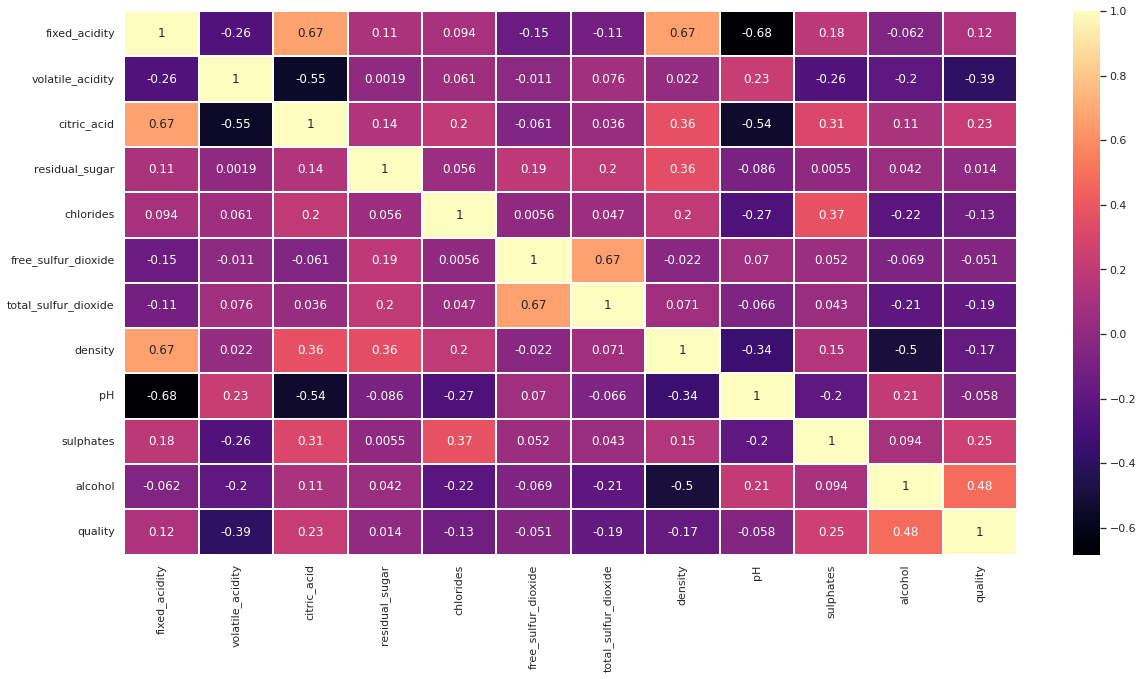

In [34]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "magma");

## Correlation




In [10]:
list = (df[["alcohol","density"]].corr(), df[["fixed_acidity","pH"]].corr(),
        df[["citric_acid","pH"]].corr(), df[["fixed_acidity","density"]].corr(),
        df[["free_sulfur_dioxide","total_sulfur_dioxide"]].corr())
for corr in list:
    print(corr, "\n\n")

         alcohol  density
alcohol  1.00000 -0.49618
density -0.49618  1.00000 


               fixed_acidity        pH
fixed_acidity       1.000000 -0.682978
pH                 -0.682978  1.000000 


             citric_acid        pH
citric_acid     1.000000 -0.541904
pH             -0.541904  1.000000 


               fixed_acidity   density
fixed_acidity       1.000000  0.668047
density             0.668047  1.000000 


                      free_sulfur_dioxide  total_sulfur_dioxide
free_sulfur_dioxide              1.000000              0.667666
total_sulfur_dioxide             0.667666              1.000000 




In the code blocks below we will look at the <mark><b>Pearson correlation coefficient</b></mark> between some variables 

In [11]:
print("Pearson correlation coefficient:", st.pearsonr(df["alcohol"],
                                                      df["density"]))

Pearson correlation coefficient: PearsonRResult(statistic=-0.49617977024170173, pvalue=3.9388353399881845e-100)


In [12]:
print("Pearson correlation coefficient:", st.pearsonr(df["free_sulfur_dioxide"],
                                                      df["total_sulfur_dioxide"]))

Pearson correlation coefficient: PearsonRResult(statistic=0.6676664504810216, pvalue=6.40472295468106e-207)


In [13]:
print("Pearson correlation coefficient:", st.pearsonr(df["fixed_acidity"],
                                                      df["pH"]))

Pearson correlation coefficient: PearsonRResult(statistic=-0.6829781945685313, pvalue=4.063034039843752e-220)


In [14]:
print("Pearson correlation coefficient:", st.pearsonr(df["citric_acid"],
                                                      df["pH"]))

Pearson correlation coefficient: PearsonRResult(statistic=-0.5419041447395094, pvalue=1.0072013259116523e-122)


In [15]:
print("Pearson correlation coefficient:", st.pearsonr(df["fixed_acidity"],
                                                      df["density"]))

Pearson correlation coefficient: PearsonRResult(statistic=0.6680472921189736, pvalue=3.0747470608605733e-207)


## DATASET PREPROCESSING

In [22]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Divide quality range into 2 parts

## Quality >5=1 and Quality<5=0

In [18]:
df["quality"] = np.where(df["quality"] > 5, 1, 0)
df["quality"]

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32

## Look at Dataset (with changed 'quality' variable)

In [21]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Select Dependent and Independent Variables

In [24]:
# we select dependent variable (label)
y = df["quality"]

# we select independent variable
x = df.drop("quality", axis = 1)

## Split Dataset into Train and Test Sets

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 1)

## Standardization

In [46]:
norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

## MinMax scaling is a crucial step in data preprocessing that ensures all features contribute equally to the model, improves convergence rates, and enhances the interpretability and performance of many machine learning algorithms.

In [26]:
x_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1144,7.3,0.320,0.23,2.3,0.066,35.0,70.0,0.99588,3.43,0.62,10.1
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.2
446,12.5,0.380,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5
399,8.7,0.765,0.22,2.3,0.064,9.0,42.0,0.99630,3.10,0.55,9.4
647,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.0
...,...,...,...,...,...,...,...,...,...,...,...
715,7.2,0.490,0.18,2.7,0.069,13.0,34.0,0.99670,3.29,0.48,9.2
905,9.2,0.580,0.20,3.0,0.081,15.0,115.0,0.99800,3.23,0.59,9.5
1096,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8
235,7.2,0.630,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0


In [27]:
x_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3
...,...,...,...,...,...,...,...,...,...,...,...
1416,10.0,0.320,0.59,2.2,0.077,3.0,15.0,0.99940,3.20,0.78,9.6
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1
1204,7.2,0.360,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.99430,3.58,0.52,9.9


## BUILDING CLASSIFICATION MODELS

## K-Nearest Neighbors Model

In [29]:
knn = KNeighborsClassifier()

## Hyperparameter Tuning for KNN Model

In [35]:
knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"]
             }

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

## Build KNN Model with Best Parameters

In [32]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=21, weights='distance')

In [34]:
params = knn_cv_model.best_params_

# Initialize and fit the KNN model without the leaf_size parameter
knn_model = KNeighborsClassifier(n_neighbors=params["n_neighbors"],
                                 weights=params["weights"])
knn_model.fit(x_train, y_train)

# Create a DataFrame with the model parameters
data = {
    "Parameter": ["n_neighbors", "weights"],
    "Value": [params["n_neighbors"], params["weights"]]
}

params_df = pd.DataFrame(data)
print(params_df)


     Parameter     Value
0  n_neighbors        21
1      weights  distance


## Accuracy Score of KNN Model on Test set

In [53]:
y_pred = knn_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8025

## Classification Report of KNN Model

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       188
           1       0.82      0.80      0.81       212

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



## Decision Tree Classifier Model

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Predict on the test data
y_pred = clf.predict(x_test)


In [37]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


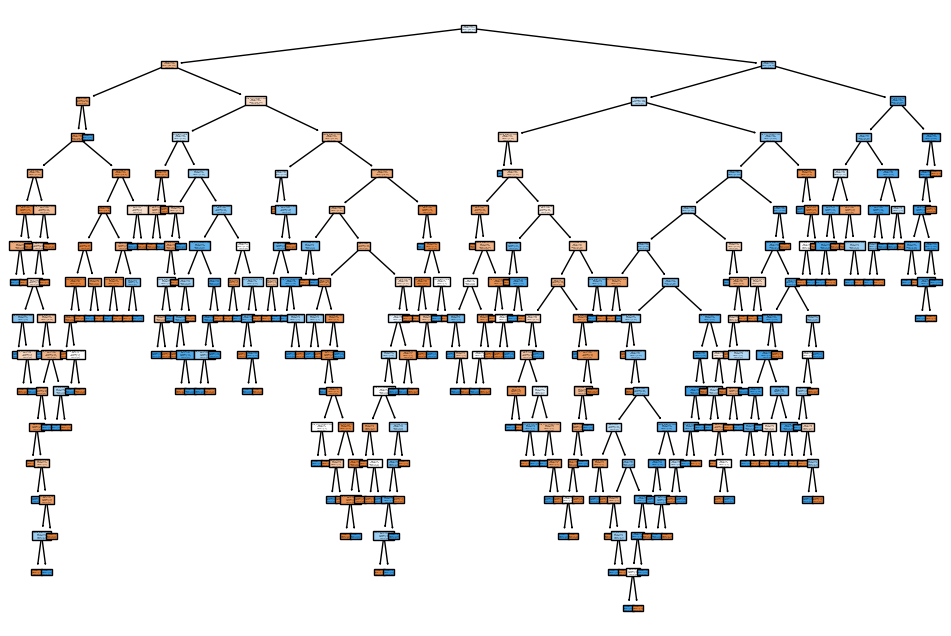

In [70]:

clf = DecisionTreeClassifier(random_state=1)

# Define the parameter grid
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator found by GridSearchCV
best_clf = grid_search.best_estimator_

# Predict on the test data
y_pred = best_clf.predict(x_test)

plt.figure(figsize=(12, 8))
plot_tree(best_clf, filled=True, feature_names=x.columns, class_names=True)
plt.show()


In [71]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [72]:
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       188
           1       0.79      0.73      0.76       212

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.75       400
weighted avg       0.76      0.76      0.76       400



AUC: 0.72


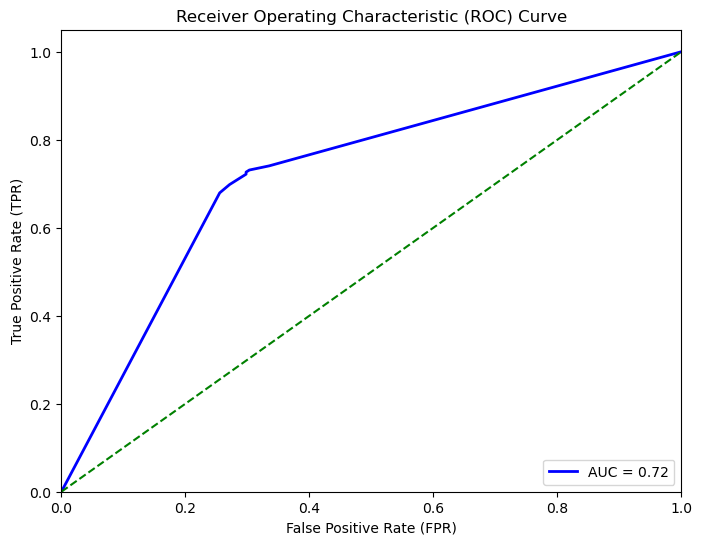

In [86]:
# Predict probabilities on the test data
y_pred_proba = best_clf.predict_proba(x_test)[:, 1]

# Calculate false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
auc_score = auc(fpr, tpr)
print(f"AUC: {auc_score:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Random Forest Classifier Model

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

In [81]:
# Step 2: Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
# Step 3: Predict on test data and calculate accuracy
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [83]:
# Step 4: Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       188
           1       0.83      0.81      0.82       212

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



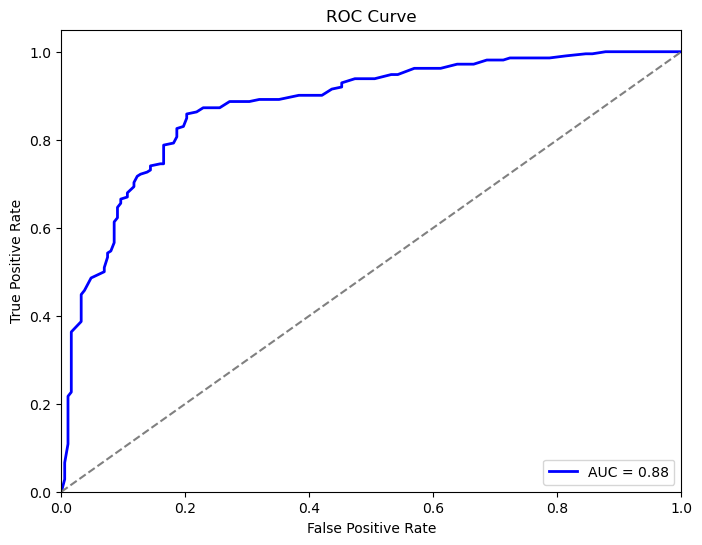

In [84]:
# Step 5: Plot ROC curve and calculate AUC
y_probs = rf_model.predict_proba(x_test)[:, 1]  # Probabilities of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Thank you very much 🙂